In [1]:

## Load Libraries

import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 3215 images.
The test data has 1732 images.


In [3]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 3215 images.
The test data has 1732 images.


In [4]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))

The train data has 25 unique labels


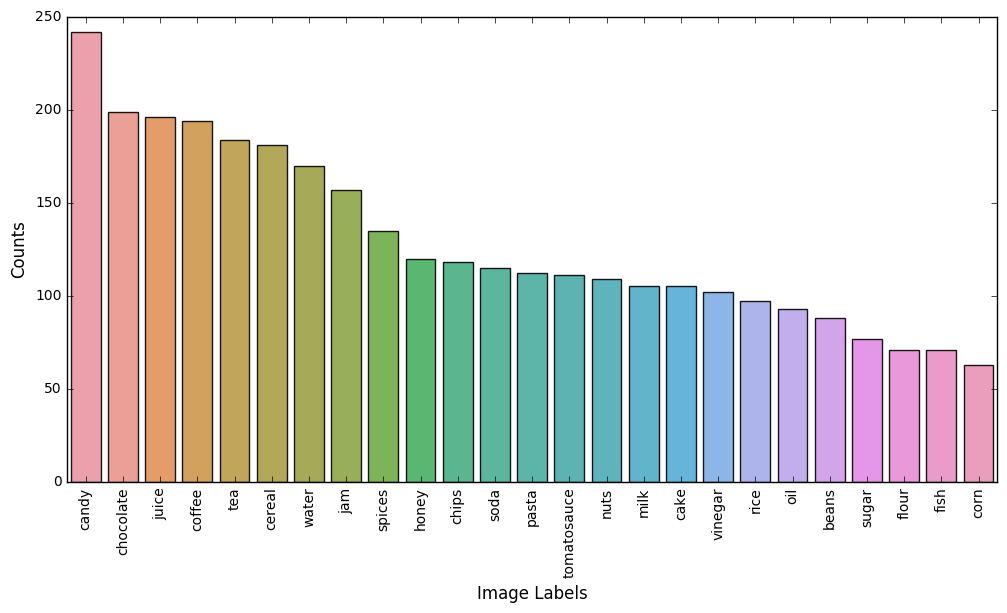

In [5]:
# lets see the distribution

label_counts = train.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()


In [6]:
# set path to read train and test image
TRAIN_PATH = 'train_img/'
TEST_PATH = 'test_img/'

In [7]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,256)) # you can resize to  (128,128) or (256,256)
    return img


In [8]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

100%|█████████████████████████████████████████████████████████████████████████████| 1732/1732 [00:05<00:00, 315.71it/s]


In [ ]:
# normalize the images
x_train = np.array(train_data, np.float32) / 255.
x_test = np.array(test_data, np.float32) / 255.

In [10]:

# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

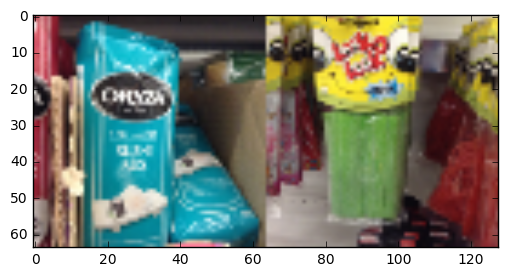

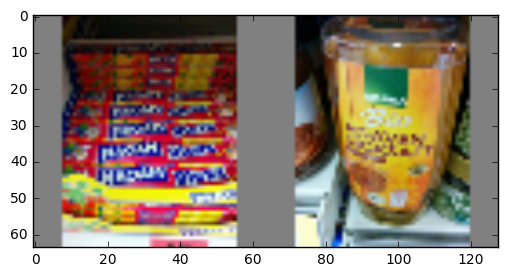

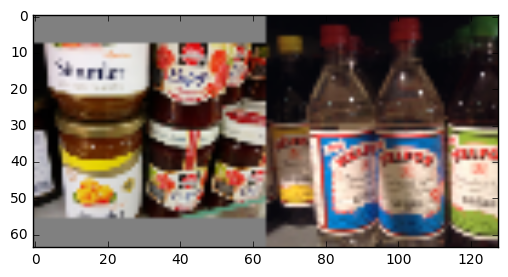

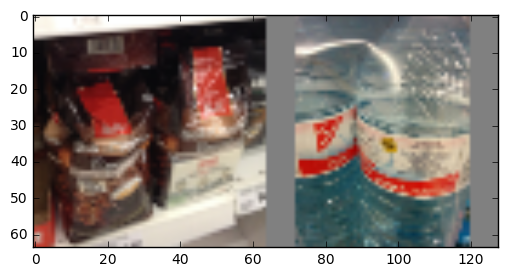

In [11]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)
    
# first 4 images in train and test set
for idx in range(4):
    show_images(idx)

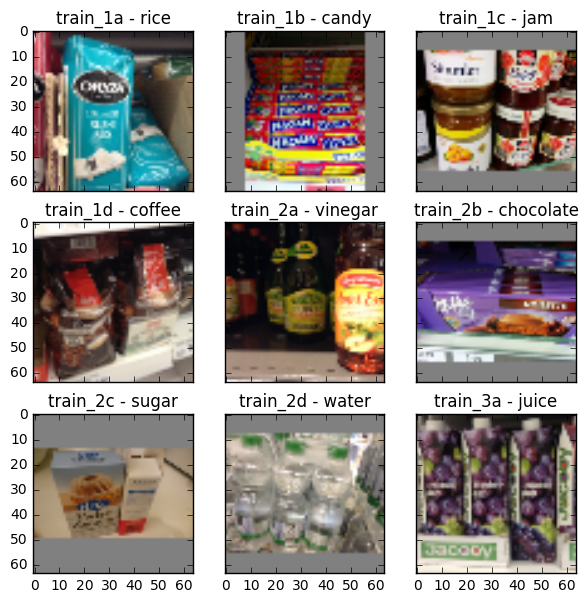

In [12]:
## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break

In [25]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [14]:
## keras accepts target variable as a ndarray so that we can set one output neuron per class
y_train = to_categorical(y_train)

In [15]:
## neural net architechture

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, shape would be (128,128,3)
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1, validation_split=0.3)

Train on 2250 samples, validate on 965 samples
Epoch 1/1
2250/2250 [==============================] - 126s - loss: 3.1907 - acc: 0.0636 - val_loss: 3.1550 - val_acc: 0.0756


In [17]:
from keras.models import load_model

In [19]:
import h5py

In [20]:
model.save_weights('my_model_weights.h5')

In [26]:
# new model

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images


In [37]:

train_generator_augmented = train_datagen_augmented.flow_from_directory(
        TRAIN_PATH)


Found 0 images belonging to 0 classes.


[array([[[187,  73,  91],
         [200,  98, 108],
         [219, 149, 158],
         ..., 
         [ 40,  36,  39],
         [ 38,  32,  39],
         [ 36,  34,  39]],
 
        [[203,  88,  99],
         [195,  99, 106],
         [216, 142, 145],
         ..., 
         [ 39,  35,  35],
         [ 38,  34,  38],
         [ 38,  33,  34]],
 
        [[253, 241, 241],
         [207, 114, 120],
         [228, 154, 155],
         ..., 
         [ 43,  41,  44],
         [ 44,  37,  41],
         [ 42,  38,  41]],
 
        ..., 
        [[161, 148, 149],
         [182, 167, 162],
         [144, 127, 122],
         ..., 
         [ 25,  43,  49],
         [114, 102,  82],
         [120, 105,  89]],
 
        [[215, 202, 197],
         [192, 176, 172],
         [ 94,  60,  60],
         ..., 
         [ 43,  45,  45],
         [112,  98,  73],
         [113,  98,  81]],
 
        [[210, 193, 188],
         [135,  95,  97],
         [ 80,  25,  34],
         ..., 
         [ 69,  60,  58